In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
dataset = pd.read_csv('heart.csv')

# data understanding

In [6]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# As you can see from the output above, there are a total of 13 features and 1 target variable. Also, there are no missing values so we don't need to take care of any null values. Next, I used describe() method.

In [13]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# The method revealed that the range of each variable is different. The maximum valu of age is 77 but for chol is 564. Thus,  feature scaling must be performed on the dataset.

# Correlation Matrix

In [15]:
"""To begin with, let's see the correlation matrix matrix of  features and try to analyze it. The figure size is defined to 12 x 8 by using rcParams. 
Then I, used pyplot to show the correlation matrix. 
Using xticks and yticks, I've added names to the correlation matrix, colbar() shows the colobar forr the matrix."""

"To begin with, let's see the correlation matrix matrix of  features and try to analyze it. The figure size is defined to 12 x 8 by using rcParams. \nThen I, used pyplot to show the correlation matrix. \nUsing xticks and yticks, I've added names to the correlation matrix, colbar() shows the colobar forr the matrix."

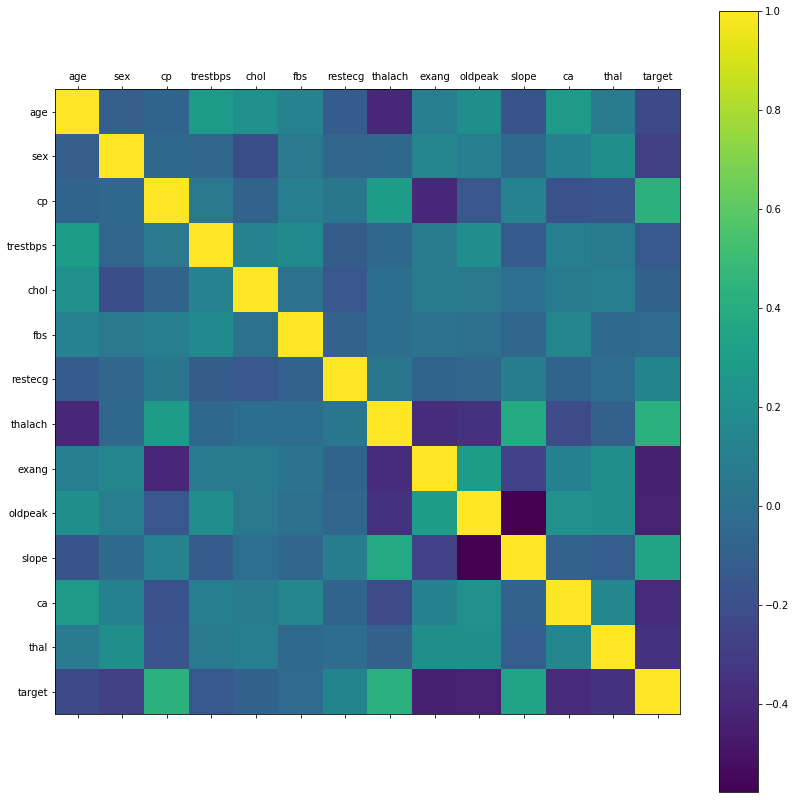

In [17]:
rcParams['figure.figsize'] = 20,14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

# Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAE8022898>,
      dtype=object)

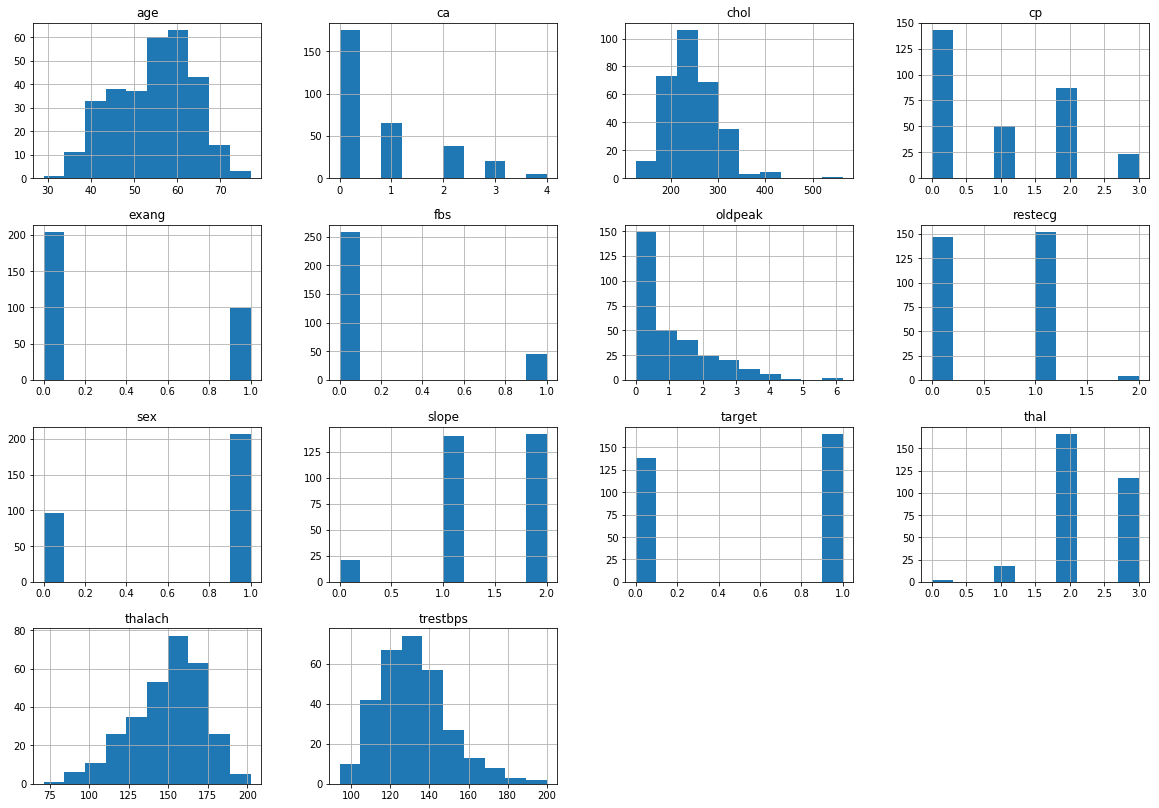

In [18]:
dataset.hist()

Text(0.5,1,'Count of each Target Classes')

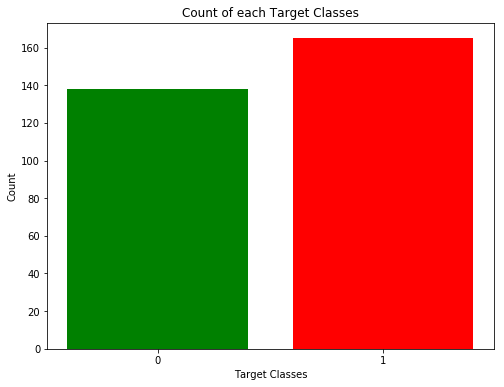

In [19]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0,1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Classes')

In [22]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])

In [23]:
print(dataset)

     age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0  cp_1  \
0     63       145   233      150      2.3       1      0      1     0     0   
1     37       130   250      187      3.5       1      0      1     0     0   
2     41       130   204      172      1.4       1      1      0     0     1   
3     56       120   236      178      0.8       1      0      1     0     1   
4     57       120   354      163      0.6       1      1      0     1     0   
5     57       140   192      148      0.4       1      0      1     1     0   
6     56       140   294      153      1.3       1      1      0     0     1   
7     44       120   263      173      0.0       1      0      1     0     1   
8     52       172   199      162      0.5       1      0      1     0     0   
9     57       150   168      174      1.6       1      0      1     0     0   
10    54       140   239      160      1.2       1      0      1     1     0   
11    48       130   275      139      0

In [24]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])


In [27]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

TypeError: 'DataFrame' object is not callable

# I'll now import train_test_split to split

In [29]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [30]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [34]:
print(X_test)

          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
225  1.724218  0.763956 -1.396537 -1.077820  1.346147      0      1     1   
152  1.062485  2.191778 -0.372287  0.234095 -0.379244      0      1     0   
228  0.511041  2.191778  0.806568  0.409017 -0.724323      0      1     0   
201  0.621330 -0.378302  0.226803 -0.378132  1.518686      0      1     1   
52   0.841908 -0.092738 -0.294985 -0.159479  0.655990      0      1     0   
245 -0.702136 -0.435415  0.536011  0.715131 -0.465514      0      1     1   
175 -1.584446 -1.234996 -1.531816 -1.558855  0.828529      0      1     1   
168  0.952197 -0.092738  0.149501 -0.115749  0.310912      0      1     1   
223  0.180175  3.905165  0.806568 -0.727976  2.553921      1      0     1   
217  0.952197 -0.092738  1.618238 -0.771706  0.655990      0      1     1   
111  0.290464  1.049520 -2.324160  1.021244 -0.724323      0      1     0   
135 -0.591847 -0.092738  0.439384  0.583939 -0.896862      1      0     1   

In [35]:
#K nearest neighbours

In [36]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors= k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

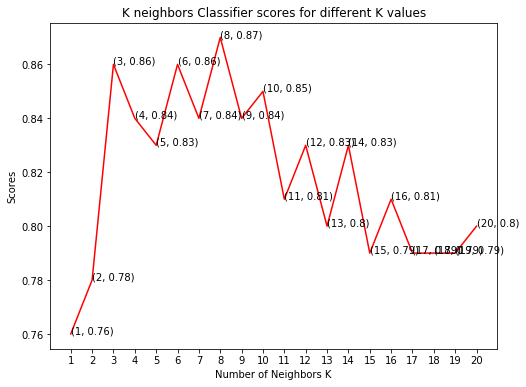

In [45]:
plt.plot([k for k in range(1,21)], knn_scores, color = 'red')

for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors K')
plt.ylabel('Scores')
plt.title('K neighbors Classifier scores for different K values')
knn_scorex=(max(knn_scores)*100)

In [47]:
print(f'The score for K neighbor is {knn_scorex}% with neightbors')

The score for K neighbor is 87.0% with neightbors


In [48]:
#svm

In [52]:
svc_scores = []

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5,1,'SVC scores for differnt Kernels')

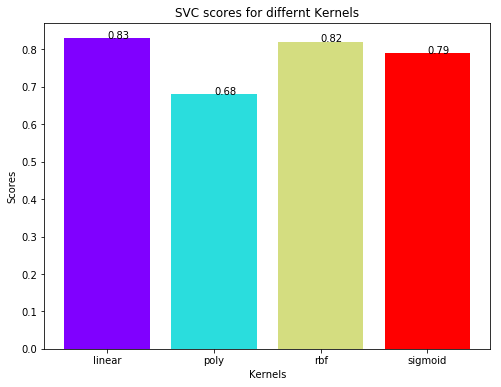

In [54]:
colors = rainbow(np.linspace(0,1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('SVC scores for differnt Kernels')

Text(0.5,1,'SVC scores for differnt Kernels')

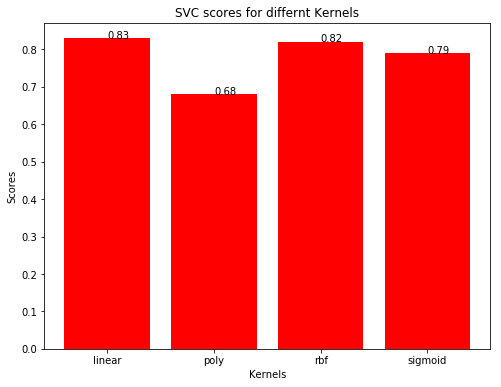

In [62]:
colors = rainbow(np.logspace(0,1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('SVC scores for differnt Kernels')

In [63]:
#Decision TRee

In [67]:
dt_scores = []

for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features= i, random_state= 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

0.79

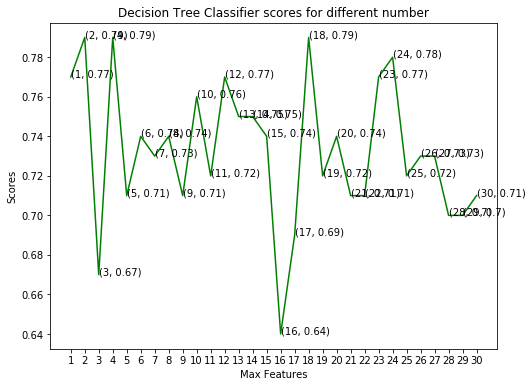

In [68]:
plt.plot([i for i in range(1, len(X.columns)+1)], dt_scores, color = 'green')

for i in range(1, len(X.columns)+1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns)+1)])
plt.xlabel('Max Features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number')
max(dt_scores)

In [69]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators= i, random_state= 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

AttributeError: Unknown property ticks

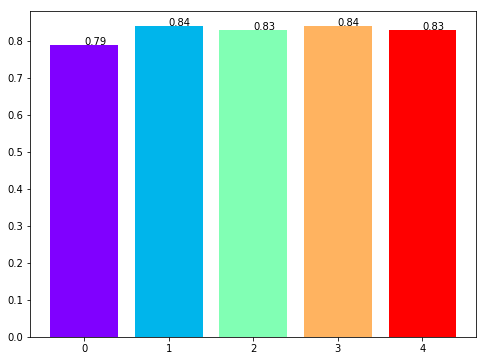

In [72]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors)

for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimators) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier for different numbers')
